U0-d0


<IPython.core.display.Javascript object>


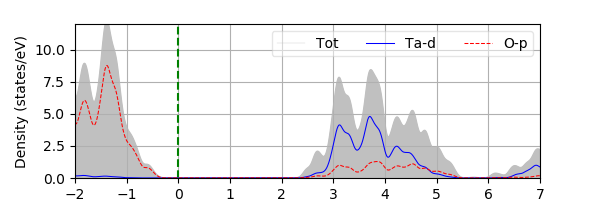

U0-d05


<IPython.core.display.Javascript object>


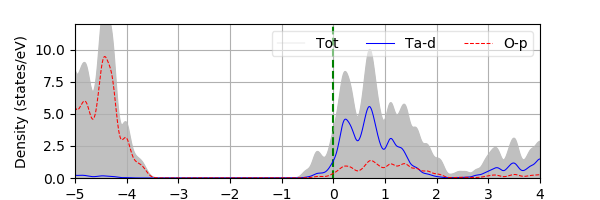

U0-d1


<IPython.core.display.Javascript object>


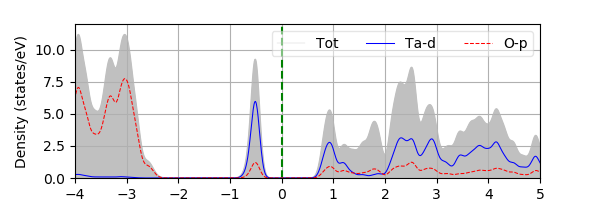

In [2]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
%matplotlib notebook
### Plot eDOS from .dat file ###

#### SETTINGS ##############################################################
DATA_LOC_ROOT = 'elec-dos_'
#DIR_LS = ['AAAB', 'AAB', 'AB', 'AABB']
SUFFIXES = ['U0-d0','U0-d05','U0-d1']
FILETYPE = '.dat'

YLIMS = [[0,12]]*6 #[[-7,7],[-7,7],[-7,7],[-7,7],[-7,7],[-7,7]] # per DIR in DIR_LS
XLIMS = [[-2,7],[-5,4],[-4,5],[-2,7],[-5,4],[-4,5]]

SAVE_DIR = 'figures/'
SAVE_NAMES = [DATA_LOC_ROOT + elem for elem in SUFFIXES]

LABELS = ['Tot', 'Ta-d', 'O-p']
STYLES = [None,  'b-',   'r--']


#FILL = {'Tot Down','atom-d','atom'} # these data will be filled in the plot
SPINPOL = True

#PLOT_TITLE = 'Electronic DoS for MgTa2O6'
X_AXIS = 'Energy (eV)'
Y_AXIS = 'Density (states/eV)'
SKIP = 0   # skip total dos?
PLOT_TOT = True
NORM = 1   # number of formula units contained in poscar
##############################################################################

SKIP_OG = SKIP

## Extracting data
for i, suffix in enumerate(SUFFIXES):
    print(suffix)
    fig = plt.figure(figsize=(6, 2))
    plt.axvline(x=0,color='green',linestyle='--')

    with open(DATA_LOC_ROOT + suffix + FILETYPE,'r') as file:
        data = file.read().split('\n\n')

        first = True

        for j, group in enumerate(data[SKIP:]): 
            SKIP = SKIP_OG #reset skip
            if len(group) > 10:
                pairs = group.split()
                #print(pairs)
                xs = np.array([float(x) for x in pairs[0::2]])[1:]
                if suffix == 'd0625':
                    ys = np.array([float(x)/(2*NORM) for x in pairs[1::2]])[1:]
                else:
                    ys = np.array([float(x)/NORM for x in pairs[1::2]])[1:]

                if first: #total up
                    plt.plot(xs,ys,linewidth=0.25,color='silver', label=LABELS[j])
                    d = scipy.zeros(ys.size)
                    plt.fill_between(xs, ys, where=ys>=d, interpolate=True, color='silver')
                    first = False
                
                elif j == 1 and SPINPOL: #total down
                    plt.plot(xs,ys,linewidth=0.25,color='silver')
                    d = scipy.zeros(ys.size)
                    plt.fill_between(xs, ys, where=ys<=d, interpolate=True, color='silver')
                
                elif j % 2 == 1 and SPINPOL: #spin down
                    plt.plot(xs, ys, STYLES[j-1], linewidth=0.75,label=LABELS[j-1]) 
                
                elif SPINPOL: #spin up
                    plt.plot(xs, ys, STYLES[j//2], linewidth=0.75, label=LABELS[j//2])    

                else: #spin up
                    plt.plot(xs, ys, STYLES[j], linewidth=0.75, label=LABELS[j])    
                    
            elif len(group) > 10 and first:
                first = False

    ## Plotting
    plt.grid(True)
    plt.xlabel(X_AXIS)
    plt.ylabel(Y_AXIS)
    plt.xlim(XLIMS[i])
    plt.ylim(YLIMS[i])
    #plt.ylim(bottom=0)
    plt.legend(loc='upper right',ncol=3, fancybox=True, framealpha=0.5)
    
    
    plt.show()

    ## Saving plot
    fig.savefig(SAVE_DIR + SAVE_NAMES[i] + '.png',bbox_inches='tight',dpi=500)

# # Tabulating/saving table
# with open(FILE_NAME + '.txt', 'w+') as file:
#     file.write('{}\t{}'.format(labels[0],labels[1]))
#     for i in range(len(xs)):
#         file.write('\n' + str(round(xs[i],X_ROUND)) + "\t" + str(round(ys[i],Y_ROUND)))